# Scikit Learn Project

Scikit Learn webpage: https://scikit-learn.org/stable/

***

<br>

## Introduction

# TO DO

- Re-do classification algorithms passing through only the four columns with highest correlations to quality. 

- look at Ian's Simple linear regression notebook: https://nbviewer.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/main/simple-linear-regression.ipynb to improve the diabetes code

## Definitions 
- Regression analysis is a way of mathematically sorting out which of those variables does indeed have an impact.

## Layout
- Intro
- Exploratory
- Classification Analysis (Logistic regression is basically a supervised classification algorithm.*)
- Regression
***

<br>

## Objective
***

To predict the quality score of the wine based on its chemical properties. 
Regression and classification can be applied to this dataset. 

<br>

## Introduction to the Wine Quality Data Set
***

This data set can be found at: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Article based on this data set: https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub

Useful article: <br>
Regression from scratch — Wine quality predictionhttps://medium.datadriveninvestor.com/regression-from-scratch-wine-quality-prediction-d61195cb91c8

## Import libraries

In [242]:
# Numerical array.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Plotting nice statistical plots.
import seaborn as sns

# Metrics
from sklearn.metrics import mean_squared_error, r2_score

#LINEar regre, 
#rom sklearn.linear_model import LinearRegression


In [243]:
# Adjusting plot size to standard size.
plt.rcParams['figure.figsize'] = (15, 10)

# Setting colour scheme.
plt.style.use('ggplot')

In [244]:
# Loading the Wine Quality Data Set
df = pd.read_csv("data/winequality_red.csv")    # Using the red wine data set

# View the dataframe
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [349]:
# Check shape (rows, columns).
df.shape

(1599, 12)

In [245]:
# Check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [246]:
# Retrieve general information about the dataframe. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Converted dataset from xlxs file to csv and corrected the csv file by replacing all of the semi-colons with commas.

In [247]:
# Statistical summary
df.describe().round(2)  # round data to 2 decimal places

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [248]:
var_names = df.columns
var_names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<br>

## Visualising the data

***

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

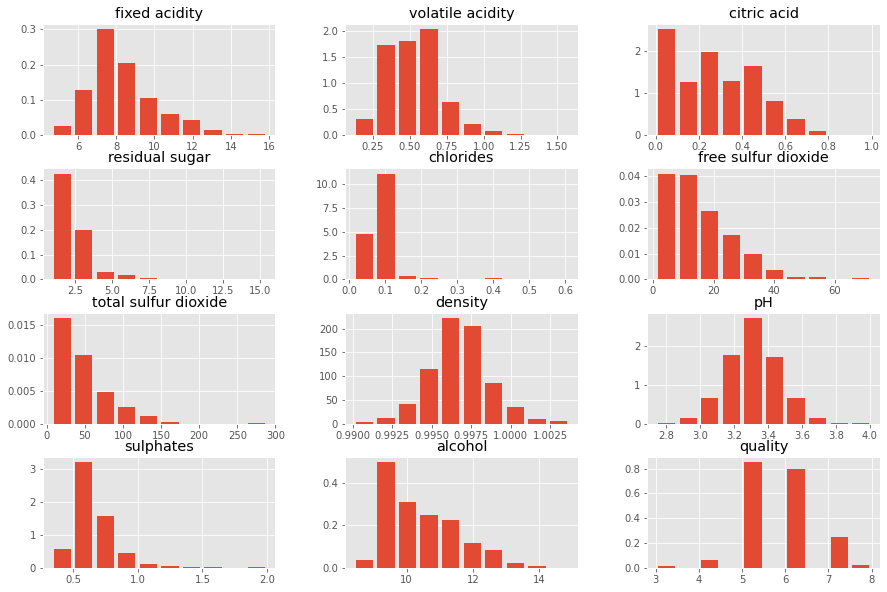

In [249]:
# Histogram and normal distribution plot of each variable
df.hist(rwidth=0.8, density=True)

<br>

## Correlations


Using the seaborn correlation heatmap, we can visualise the highest correlations between individual variables and quality(the dependent variable). 

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


<AxesSubplot:>

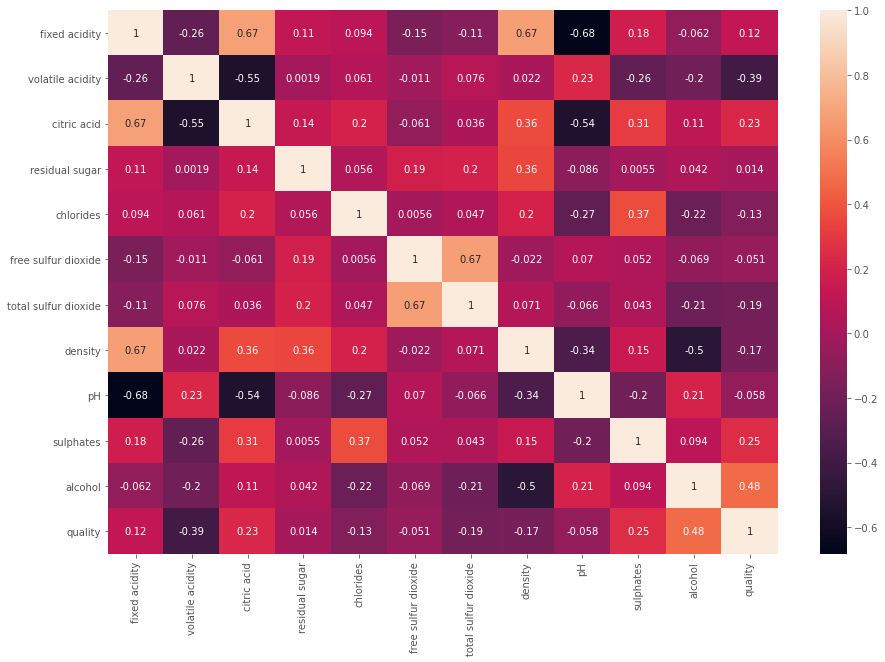

In [250]:
# Get correlation values. 
correlations = df.corr()['quality'].drop('quality')
print(correlations)

# Correlations heatmap.
sns.heatmap(df.corr(), annot=True)

Most significant correalations:
- positive correlation between alcohol and quality. 
- negative correlation between quality and volatile acidity. 

In [251]:
# Gets absolute numeric values of correlation results.
abs_corrs = correlations.abs()
abs_corrs
# Save four columns with significantly high correlations.
correlations = abs_corrs.nlargest(4)
print(correlations)

alcohol             0.476166
volatile acidity    0.390558
sulphates           0.251397
citric acid         0.226373
Name: quality, dtype: float64


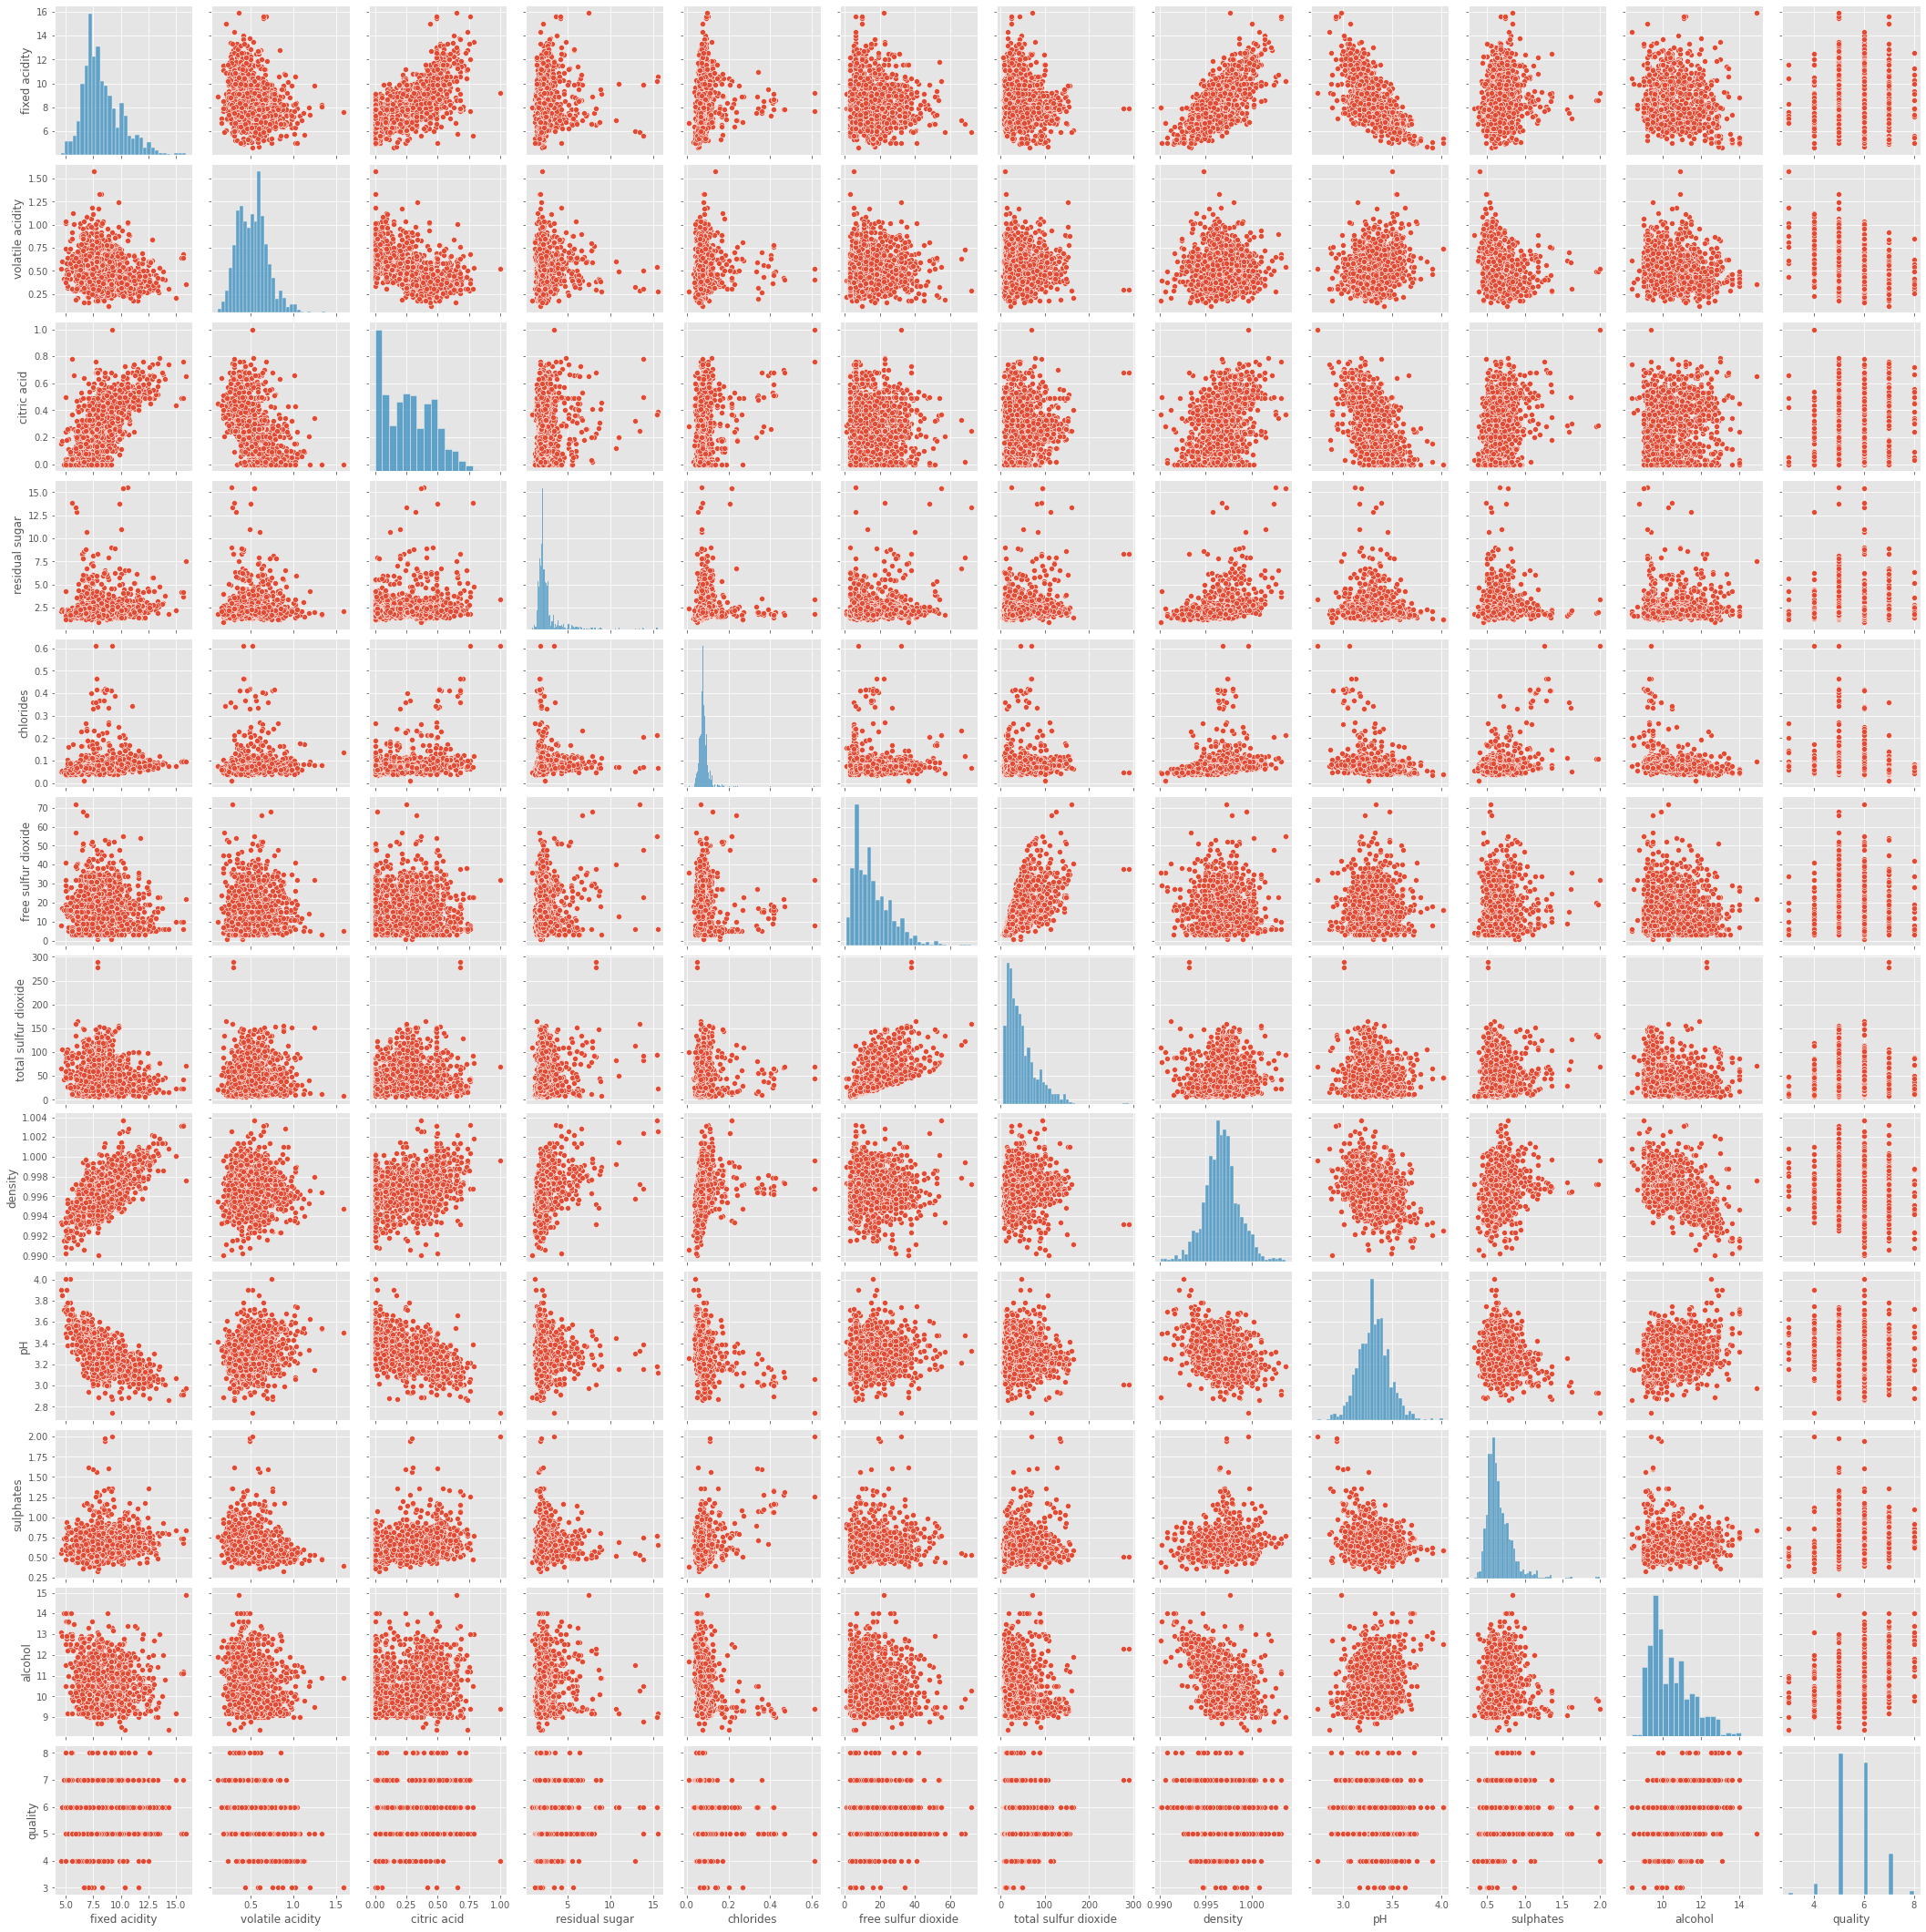

In [252]:
# Pair plots.
sns.pairplot(df)
plt.show()


<br>

## Two Dimensions

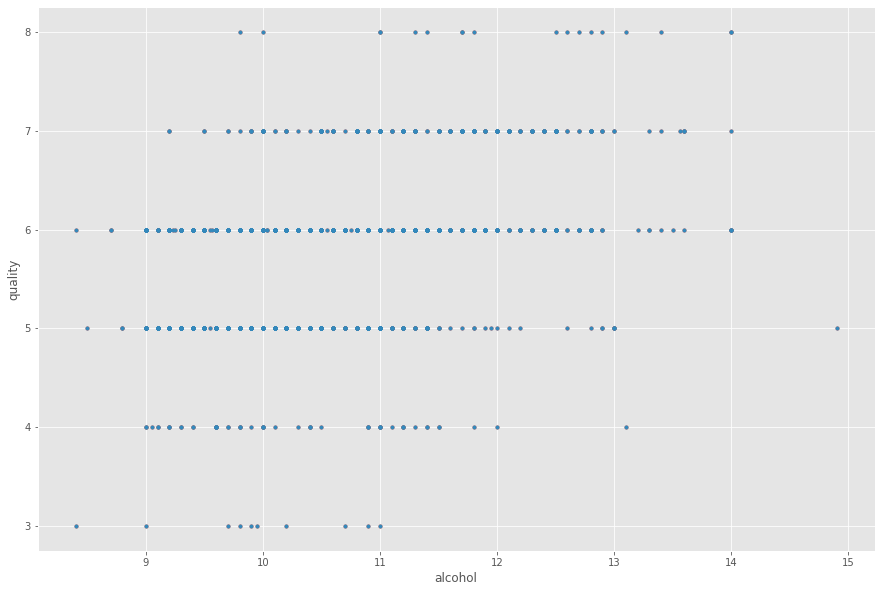

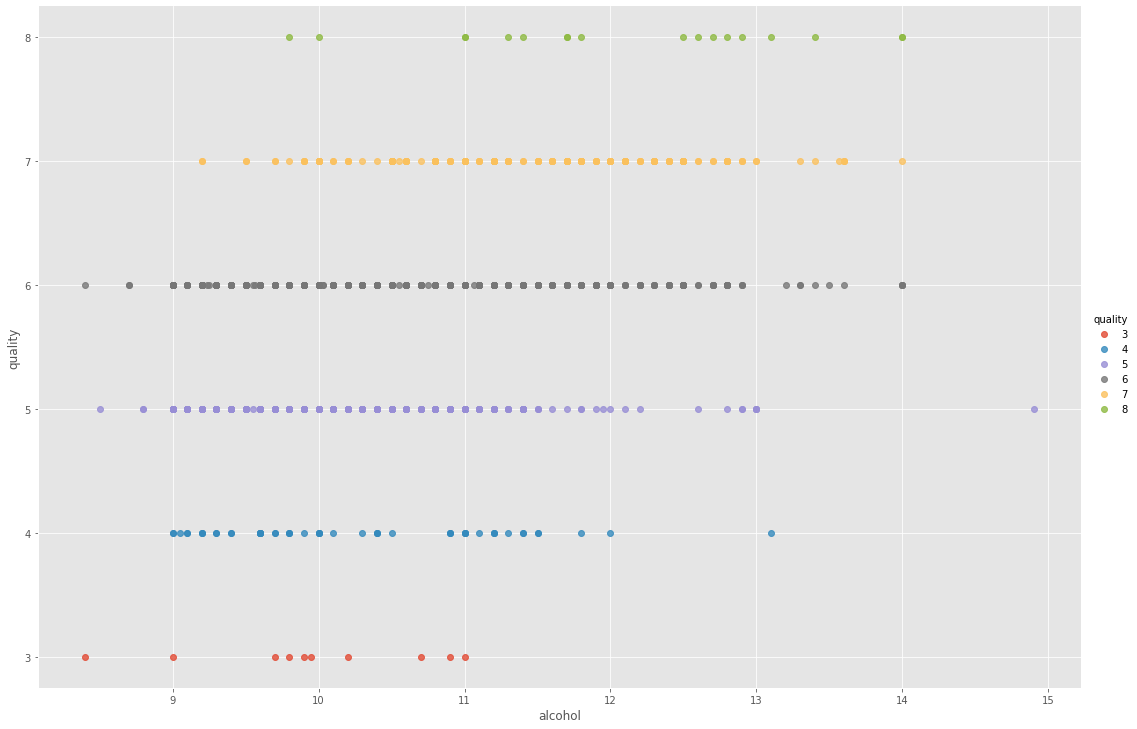

In [253]:
# New plot.
fig, ax = plt.subplots()

# Scatter plot.
ax.plot(df['alcohol'], df['quality'], '.') # use dot to represent data
ax.plot(df['alcohol'], df['quality'], '.') # use dot to represent data

# Set axis labels.
ax.set_xlabel('alcohol')
ax.set_ylabel('quality')

# Put this data as barchart
# Seaborn plot using quality distinguish data points
sns.lmplot(x="alcohol", y="quality", hue='quality', data=df, fit_reg=False, height=10, aspect=1.5);


In [254]:
# Grouping by quality
group = df.groupby('quality')
group

In [255]:
# Pivot tables.
group.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [256]:
# Creates a list of variable names
var_names = list(df.columns)

<br>
The following plots were generated using seaborn to visualise the spread of data.

Each plot below represents individual variables in the data set. 

Source: https://seaborn.pydata.org/generated/seaborn.boxplot.html

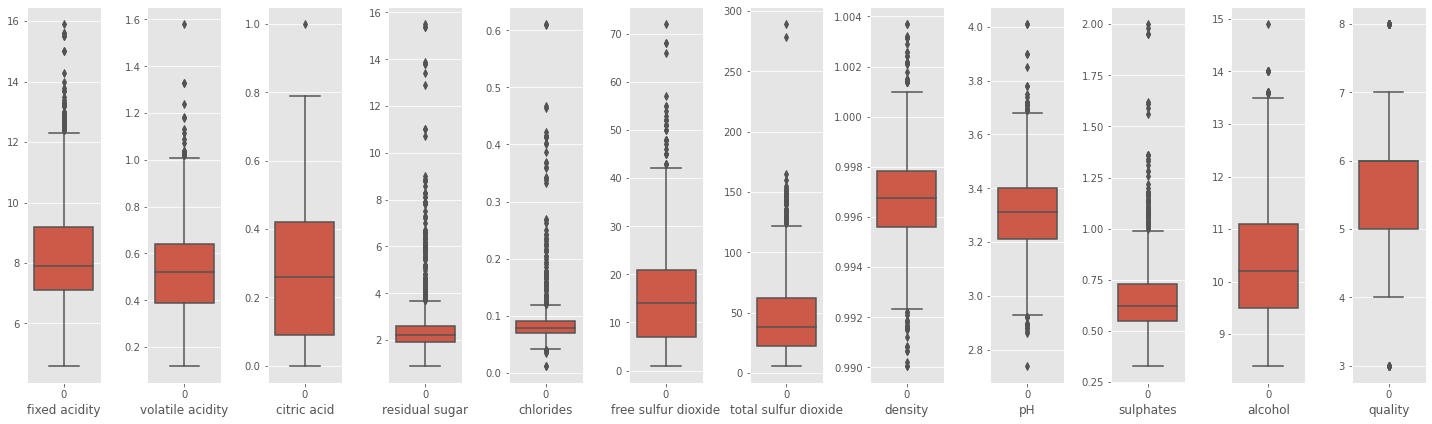

In [257]:
# Box plots.
fig = plt.figure(figsize=(20, 6)) # figsize = width, height in inches.
gs = fig.add_gridspec(1, 12) # A grid for which we can place the data.

count = 0
for var in var_names:
    # Customises grid layout using GridSpec.
    ax = fig.add_subplot(gs[0, count])
    sns.boxplot(data=df[var])
    ax.set_xlabel(var)
    count += 1

fig.tight_layout()
plt.show()

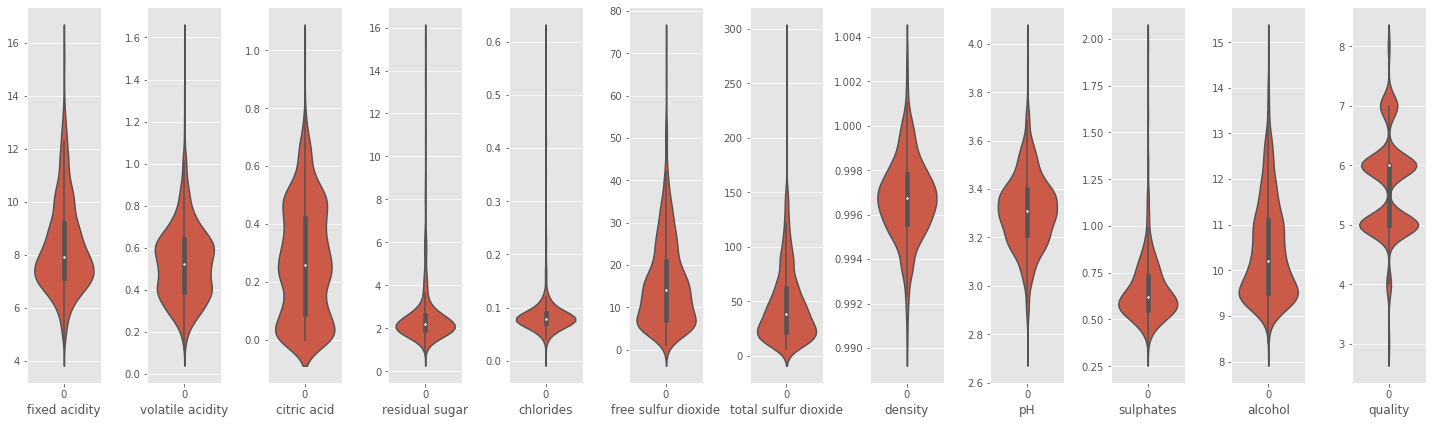

In [258]:
# Violin Plot
fig = plt.figure(figsize=(20, 6)) # figsize = width, height in inches.
gs = fig.add_gridspec(1, 12) # A grid for which we can place the data.

count = 0
for var in var_names:
    # Customises grid layout using GridSpec.
    ax = fig.add_subplot(gs[0, count])
    sns.violinplot(data=df[var])
    ax.set_xlabel(var)
    count += 1

fig.tight_layout()
plt.show()

Observations for each variable:

- Quality: most values are between 5 and 7. While there are no values in categories 1, 2 and 10 and few values in categories 3, 4 ad 9. 
- 
See https://online.stat.psu.edu/stat508/lesson/wqd/wqd.1 for more observations.

# Test and Train Split

In [259]:
# Splits the dataframe.
train, test = mod.train_test_split(df, test_size = 0.2)

In [260]:
# Views some of the training data.
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7
1196,7.9,0.58,0.23,2.3,0.076,23.0,94.0,0.99686,3.21,0.58,9.5,6
573,10.5,0.59,0.49,2.1,0.070,14.0,47.0,0.99910,3.30,0.56,9.6,4
1212,6.8,0.65,0.02,2.1,0.078,8.0,15.0,0.99498,3.35,0.62,10.4,6
506,10.4,0.24,0.46,1.8,0.075,6.0,21.0,0.99760,3.25,1.02,10.8,7


In [261]:
# View indices of train array.
train.index

Int64Index([  16, 1196,  573, 1212,  506,  751, 1535,  952,  855,  308,
            ...
             988, 1018,  293, 1581,  214,  723, 1115,  543,  458,  649],
           dtype='int64', length=1279)

In [262]:
# Shows some test data.
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
707,7.4,0.490,0.19,3.0,0.077,16.0,37.0,0.99660,3.37,0.51,10.5,5
1120,7.9,0.540,0.34,2.5,0.076,8.0,17.0,0.99235,3.20,0.72,13.1,8
1209,6.2,0.390,0.43,2.0,0.071,14.0,24.0,0.99428,3.45,0.87,11.2,7
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4
1096,6.6,0.725,0.09,5.5,0.117,9.0,17.0,0.99655,3.35,0.49,10.8,6


In [263]:
# Size of test data set.
test.index.size

320

<br>

## Checking the Test & Train Data

***

Ideally, we want the data to be segregated evenly throughout the data set. To check this, the following block of code was implemented to create a plot which depicts the test data as x's. As can be seen, the test data chose by scikit learn was evenly segregated from the data set. 

In [264]:
var_names

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [265]:
# With training data, specify inputs & outputs.
inputs = train[var_names]
outputs = train['quality']

In [266]:
inputs.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7
1196,7.9,0.58,0.23,2.3,0.076,23.0,94.0,0.99686,3.21,0.58,9.5,6
573,10.5,0.59,0.49,2.1,0.070,14.0,47.0,0.99910,3.30,0.56,9.6,4
1212,6.8,0.65,0.02,2.1,0.078,8.0,15.0,0.99498,3.35,0.62,10.4,6
506,10.4,0.24,0.46,1.8,0.075,6.0,21.0,0.99760,3.25,1.02,10.8,7


In [267]:
print(outputs)

16      7
1196    6
573     4
1212    6
506     7
       ..
723     5
1115    6
543     6
458     7
649     6
Name: quality, Length: 1279, dtype: int64


In [268]:
# Check that line 727 matches original data. 
df.iloc[727]

fixed acidity            6.400
volatile acidity         0.570
citric acid              0.020
residual sugar           1.800
chlorides                0.067
free sulfur dioxide      4.000
total sulfur dioxide    11.000
density                  0.997
pH                       3.460
sulphates                0.680
alcohol                  9.500
quality                  5.000
Name: 727, dtype: float64

<br>

## Two Dimensions: Logistic Regression?? pretty sure used all inputs here

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [269]:
# Creates a new classifier.
lre = lm.LogisticRegression(random_state=0) # Parameter is random state, meaning it uses the same random process each time.

# Train the classifier on the data.
lre.fit(inputs[['alcohol', 'volatile acidity']], outputs)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [270]:
# Classifies test data.
predictions = lre.predict(test[['alcohol', 'volatile acidity']])
predictions

array([6, 6, 6, 7, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5,
       6, 5, 5, 5, 7, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 7, 7, 5, 6, 5,
       5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 7, 5, 5,
       6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5,
       5, 5, 5, 5, 5, 7, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6,
       6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5,
       5, 6, 5, 5, 5, 5, 5, 6, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5,
       6, 5, 6, 7, 7, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 7, 5, 6,
       5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5,
       5, 6, 5, 5, 5, 6, 7, 6, 7, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6,
       6, 6, 5, 5, 7, 6, 7, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5,
       6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6,

In [271]:
# View the misclassifications.
predictions == test['quality']

707     False
1120    False
1209    False
45      False
1096     True
        ...  
484     False
359     False
156     False
894     False
759      True
Name: quality, Length: 320, dtype: bool

## Accuracy
***

In [272]:
# How accurate was the algorithm?
lre.score(test[['alcohol', 'volatile acidity']], test['quality'])

0.59375

<br>

## Misclassified

In [300]:
# Show the predictions with a column the table. 
test['predicted'] = predictions
test.head()

/var/folders/xq/j7llnxgx78d984nx_t1lty9c0000gn/T/ipykernel_4253/2389557802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predictions,predicted
1026,7.9,0.310,0.32,1.9,0.066,14.0,36.0,0.99364,3.41,0.56,12.6,6,5,5
1220,10.9,0.320,0.52,1.8,0.132,17.0,44.0,0.99734,3.28,0.77,11.5,6,6,6
400,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5,5,5
1423,6.4,0.530,0.09,3.9,0.123,14.0,31.0,0.99680,3.50,0.67,11.0,4,5,5
1278,8.0,0.715,0.22,2.3,0.075,13.0,81.0,0.99688,3.24,0.54,9.5,6,5,5


In [301]:
# Shows the misclassified data.
misclass = test[test['predicted'] != test['quality']]
misclass

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predictions,predicted
1026,7.9,0.310,0.32,1.9,0.066,14.0,36.0,0.99364,3.41,0.56,12.600000,6,5,5
1423,6.4,0.530,0.09,3.9,0.123,14.0,31.0,0.99680,3.50,0.67,11.000000,4,5,5
1278,8.0,0.715,0.22,2.3,0.075,13.0,81.0,0.99688,3.24,0.54,9.500000,6,5,5
1376,8.2,0.885,0.20,1.4,0.086,7.0,31.0,0.99460,3.11,0.46,10.000000,5,6,6
942,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.000000,7,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,7.5,0.685,0.07,2.5,0.058,5.0,9.0,0.99632,3.38,0.55,10.900000,4,5,5
1280,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.400000,6,5,5
1441,7.4,0.785,0.19,5.2,0.094,19.0,98.0,0.99713,3.16,0.52,9.566667,6,5,5
568,9.8,0.500,0.49,2.6,0.250,5.0,20.0,0.99900,3.31,0.79,10.700000,6,5,5


In [302]:
# View descriptive statistics for train quality.
round(train.groupby('quality').mean(), 3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,9.100,0.723,0.273,2.683,0.142,12.333,27.500,0.998,3.332,0.597,9.717
4,7.554,0.708,0.160,2.886,0.079,12.216,40.324,0.996,3.394,0.573,10.346
5,8.104,0.576,0.236,2.523,0.091,16.782,55.677,0.997,3.313,0.617,9.911
6,8.327,0.497,0.275,2.440,0.085,15.956,41.188,0.997,3.319,0.679,10.643
7,8.767,0.400,0.370,2.719,0.076,14.062,34.333,0.996,3.298,0.738,11.486
8,8.240,0.415,0.363,2.453,0.067,14.800,37.000,0.995,3.273,0.786,12.107


In [303]:
# View descriptive statistics for test quality.
round(test.groupby('quality').mean(), 3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,predictions,predicted
quality,,,,,,,,,,,,,
3,7.250,1.126,0.018,2.562,0.093,9.000,21.000,0.996,3.498,0.530,10.312,4.500,4.500
4,8.300,0.662,0.207,2.250,0.117,12.375,26.812,0.997,3.354,0.650,10.078,5.062,5.062
5,8.360,0.580,0.266,2.546,0.099,17.605,59.090,0.997,3.281,0.632,9.865,5.311,5.311
6,8.405,0.498,0.269,2.586,0.084,15.006,39.951,0.997,3.316,0.665,10.592,5.671,5.671
7,9.222,0.416,0.392,2.726,0.080,13.989,37.304,0.996,3.268,0.752,11.400,6.304,6.304
8,10.200,0.463,0.530,3.200,0.075,5.667,15.667,0.997,3.240,0.677,12.033,7.000,7.000


### Plot misclassifications
***

https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/main/iris-classification.ipynb

<br>

## Using All Inputs

***

In [423]:
df = pd.read_csv("data/winequality_red.csv")

In [424]:
# Split data frame in two
train, test = mod.train_test_split(df)

In [425]:
# Makes all variables inputs.
inputs, outputs = train[var_names], train['quality']

In [426]:
# Creates new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on the data.
lre.fit(inputs, outputs)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [427]:
# Classify, predicts the test data.
predictions = lre.predict(test[var_names])
predictions

array([6, 5, 5, 5, 6, 7, 7, 6, 5, 6, 5, 5, 5, 5, 6, 5, 7, 6, 6, 6, 5, 5,
       7, 5, 5, 6, 5, 5, 5, 5, 5, 7, 5, 6, 5, 7, 5, 6, 6, 5, 6, 6, 7, 5,
       6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 7, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 5, 5, 6, 5, 6, 6, 6, 5, 7, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5,
       6, 6, 5, 7, 5, 5, 7, 6, 5, 7, 6, 6, 5, 6, 7, 5, 6, 6, 6, 6, 5, 5,
       6, 5, 5, 5, 5, 5, 5, 5, 7, 7, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6,
       6, 6, 6, 5, 5, 6, 5, 5, 7, 5, 5, 5, 7, 6, 7, 7, 6, 6, 5, 5, 6, 5,
       5, 6, 6, 7, 5, 6, 5, 5, 6, 6, 5, 7, 5, 6, 7, 7, 6, 6, 6, 6, 5, 5,
       5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 7, 5, 6, 6, 6, 6, 5,
       5, 5, 5, 5, 6, 6, 5, 6, 6, 7, 5, 5, 6, 6, 5, 6, 6, 7, 6, 5, 5, 5,
       5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 7, 5, 6, 6, 7, 6, 6, 7, 5, 6,
       6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 7, 6, 6,
       5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 7, 5, 6,
       5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5,

In [428]:
# Views the misclassifications.
(predictions == test['quality']).value_counts()

True     360
False     40
Name: quality, dtype: int64

In [429]:
# Percentage score.
lre.score(test[var_names], test['quality'])

0.9

In [430]:
# Append predictions column to test dataframe. 
test['predicted'] = predictions
test.head()

/var/folders/xq/j7llnxgx78d984nx_t1lty9c0000gn/T/ipykernel_4253/4025106790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predicted
596,12.4,0.400,0.51,2.0,0.059,6.0,24.0,0.9994,3.04,0.60,9.3,6,6
400,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.9994,3.47,0.53,9.9,5,5
590,9.0,0.450,0.49,2.6,0.084,21.0,75.0,0.9987,3.35,0.57,9.7,5,5
652,15.9,0.360,0.65,7.5,0.096,22.0,71.0,0.9976,2.98,0.84,14.9,5,5
249,7.3,0.660,0.00,2.0,0.084,6.0,23.0,0.9983,3.61,0.96,9.9,6,6


This algorithm predicted the correct quality based on the various chemical properties in "Enter number here" percent of cases. 

## Nearest Neighbours Classifier

[KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

***

In [431]:
# Load wine quality data set.
df = pd.read_csv("data/winequality_red.csv")

# List of the variables
var_names = df.columns # this was list(df.columns) before, incase problem. 

In [432]:
# Splits the dataframe in two.
train, test = mod.train_test_split(df)

In [433]:
# Uses all variables as inputs
inputs, outputs = var_names, 'quality'

In [434]:
# Classifier with 10 nearest neighbors. 
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [435]:
# Fit wih training data.
knn.fit(train[inputs], train[outputs])

KNeighborsClassifier()

In [436]:
# Test on the training data.
knn.score(train[inputs], train[outputs])

0.7281067556296914

In [437]:
# Predict.
predictions = knn.predict(test[inputs])

In [438]:
# Score/accuracy
(predictions == test['quality']).value_counts(normalize=True)

True     0.5975
False    0.4025
Name: quality, dtype: float64

In [439]:
# Add new column to test dataframe with predictions
test["predictions"] = predictions
test

/var/folders/xq/j7llnxgx78d984nx_t1lty9c0000gn/T/ipykernel_4253/1097304577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predictions"] = predictions


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predictions
1076,9.9,0.320,0.56,2.0,0.073,3.0,8.0,0.99534,3.15,0.73,11.4,6,6
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,5
1220,10.9,0.320,0.52,1.8,0.132,17.0,44.0,0.99734,3.28,0.77,11.5,6,6
461,8.3,0.615,0.22,2.6,0.087,6.0,19.0,0.99820,3.26,0.61,9.3,5,5
837,6.7,0.280,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,8.3,0.260,0.42,2.0,0.080,11.0,27.0,0.99740,3.21,0.80,9.4,6,6
917,6.8,0.410,0.31,8.8,0.084,26.0,45.0,0.99824,3.38,0.64,10.1,6,5
282,7.6,0.520,0.12,3.0,0.067,12.0,53.0,0.99710,3.36,0.57,9.1,5,5
817,10.8,0.290,0.42,1.6,0.084,19.0,27.0,0.99545,3.28,0.73,11.9,6,6


<br>

## Cross Validation
https://scikit-learn.org/stable/modules/cross_validation.html

In [440]:
knn = nei.KNeighborsClassifier()
scores = mod.cross_val_score(knn, df[var_names], df['quality'])
scores

array([0.53125   , 0.55625   , 0.54375   , 0.490625  , 0.54545455])

In [441]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}") 

Mean: 0.5334659090909091 	 Standard Deviation: 0.022842322434789248


In [442]:
lre = lm.LogisticRegression(random_state=0)
scores = mod.cross_val_score(lre, df[var_names], df['quality'])
scores

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.8625    , 0.834375  , 0.88125   , 0.90625   , 0.88401254])

In [443]:
print(f"Mean: {scores.mean()}, \t Standard Deviation: {scores.std()}")

Mean: 0.8736775078369906, 	 Standard Deviation: 0.02406136554709315


Logistic regression is a better algorithm for predicting the wine's quality based on its chemical components. 

<br>

# Linear Regression 

[Scikit Learn Official Documentation]("https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html")
***

To do:

Explain linear regression. 

Use linear regression scikit learn function.

In [444]:
a = df['alcohol']
q = df['quality']

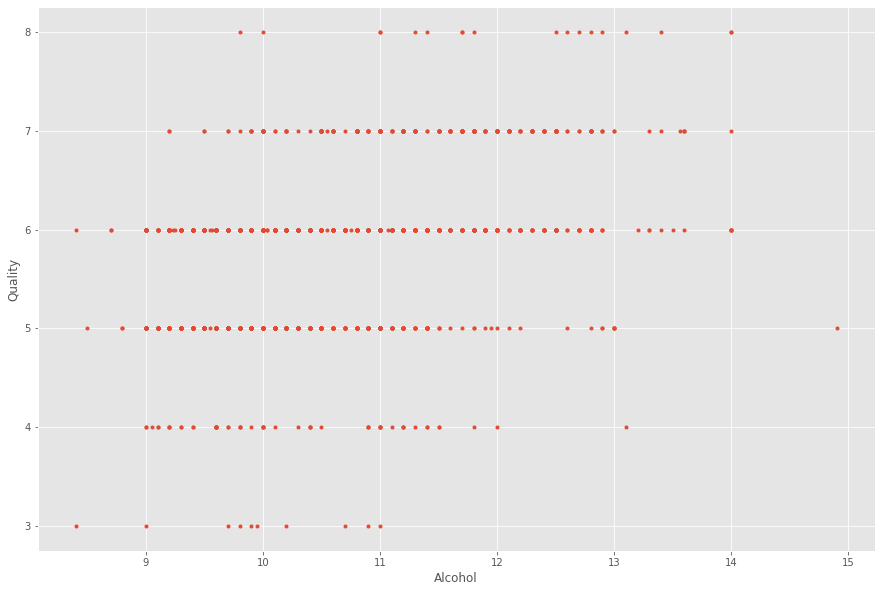

In [445]:
# New plot.
fig, ax = plt.subplots()

# Scatter plot.
ax.plot(alcohol, quality, '.') # use dot to represent data

# Set axis labels.
ax.set_xlabel('Alcohol')
ax.set_ylabel('Quality');

# Put this data as barchart
# Seaborn plot using quality distinguish data points
# sns.lmplot(x="alcohol", y="quality", hue='quality', data=df, fit_reg=False, height=10, aspect=1.5);

## Minimising the cost
***

To do:

Explanation of minimising the cost. <br>
Formula.  Y= mx + b

In [463]:
polyfit = np.polyfit(alcohol, quality, 1)

In [447]:
# First value returned from polyfit function.
m = polyfit[0]

In [448]:
c = polyfit[1]

<br>

## Plot the best fit line
***

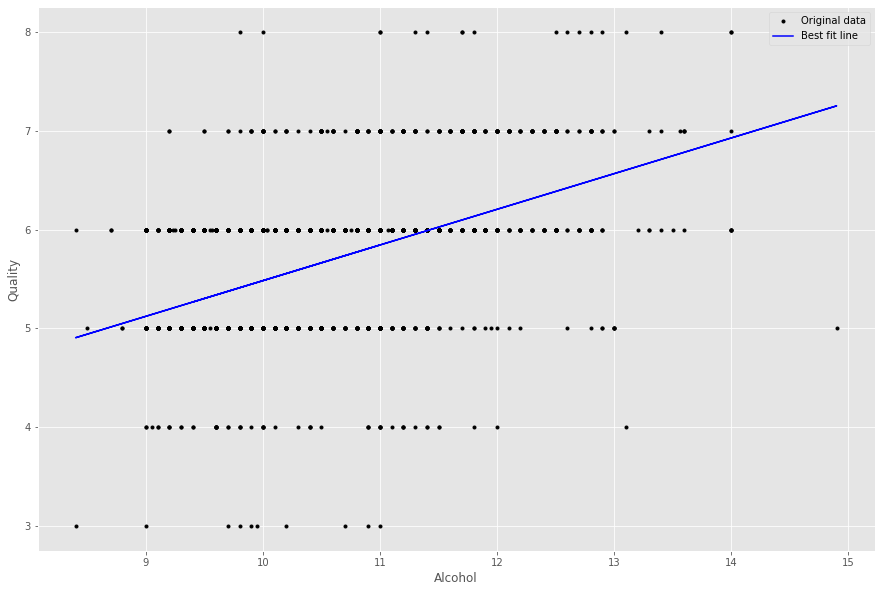

In [449]:
# Plot the best fit line.
plt.plot(a, q, 'k.', label='Original data')
plt.plot(a, m * a + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.legend()

# Show the plot.
plt.show()

## Scikit learn - `linearRegression()` function

[Official Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
***

In [475]:
# Load wine quality data set.
df = pd.read_csv("data/winequality_red.csv")

# List of the variables
var_names = df.columns

In [476]:
# Splits the dataframe in two.
train, test = mod.train_test_split(df)

In [479]:
# Makes all variables inputs.
inputs, outputs = train[var_names], train['quality']

In [480]:
# Train the data.
regr = lm.LinearRegression()
regr.fit(inputs, outputs) # These are from the training data.

LinearRegression()

In [465]:
# To get the intercept value.
regr.intercept_

-2.078337502098293e-13

In [466]:
# To get the slope value. 
regr.coef_

array([-2.77495267e-16,  2.75474088e-15,  5.07623457e-16, -5.42101086e-18,
       -1.03005644e-15,  3.29597460e-17,  3.46944695e-18,  2.05001027e-13,
       -5.80698684e-16, -4.99247995e-16,  3.79470760e-17,  1.00000000e+00])

In [469]:
# Predict.
predictions = regr.predict(test[var_names])
predictions

array([7., 5., 6., 6., 5., 5., 7., 6., 7., 5., 6., 7., 6., 6., 6., 5., 5.,
       5., 6., 6., 6., 6., 5., 7., 7., 4., 5., 6., 6., 6., 5., 6., 5., 5.,
       5., 5., 6., 7., 6., 5., 5., 6., 5., 7., 3., 6., 7., 6., 6., 8., 6.,
       4., 5., 7., 5., 6., 5., 6., 5., 6., 6., 5., 5., 6., 6., 6., 5., 6.,
       5., 5., 6., 6., 7., 5., 5., 5., 6., 5., 6., 5., 5., 6., 5., 5., 6.,
       5., 5., 7., 7., 6., 6., 6., 6., 5., 5., 5., 5., 5., 6., 5., 5., 6.,
       6., 7., 5., 6., 8., 5., 5., 5., 5., 5., 5., 5., 6., 6., 4., 5., 7.,
       5., 7., 6., 5., 5., 5., 5., 5., 6., 4., 6., 5., 6., 7., 5., 6., 5.,
       6., 5., 5., 6., 4., 5., 7., 6., 5., 6., 6., 6., 7., 6., 5., 6., 7.,
       6., 5., 7., 6., 6., 5., 6., 6., 6., 6., 6., 5., 6., 5., 7., 5., 7.,
       6., 5., 5., 7., 7., 5., 5., 6., 5., 6., 5., 5., 5., 7., 6., 4., 7.,
       6., 5., 7., 7., 5., 5., 6., 6., 6., 5., 6., 5., 7., 5., 6., 5., 7.,
       5., 6., 5., 5., 7., 5., 7., 6., 5., 6., 3., 6., 5., 6., 7., 5., 5.,
       5., 6., 5., 5., 5.

In [470]:
# Views the misclassifications.
(predictions == test['quality']).value_counts()

False    265
True     135
Name: quality, dtype: int64

ValueError: x and y must be the same size

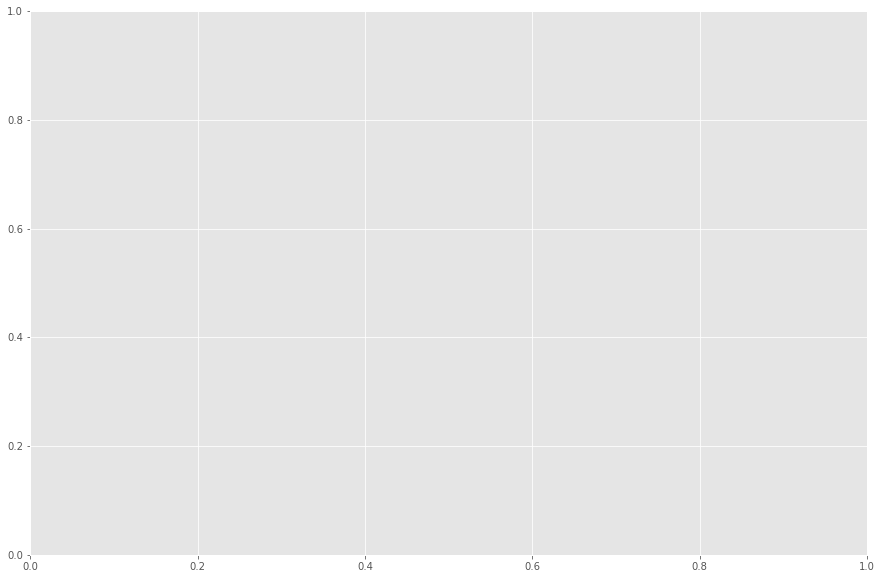

In [472]:
# Plot outputs
plt.scatter(test[var_names], test['quality'], color="black")
plt.plot(test[var_names], predictions, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()